In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [ ]:
#Uploading the Emissions data into a variable
data = pd.read_csv("/content/CO2 Emissions_Canada.csv")

In [ ]:
#Data Understanding

In [ ]:
data.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [ ]:
#Exploring number of keys in the datasets

print(f"The data has {len(data.keys())} keys:")
for key in data.keys():
  print(f"\t- {key}")


The data has 12 keys:
	- Make
	- Model
	- Vehicle Class
	- Engine Size(L)
	- Cylinders
	- Transmission
	- Fuel Type
	- Fuel Consumption City (L/100 km)
	- Fuel Consumption Hwy (L/100 km)
	- Fuel Consumption Comb (L/100 km)
	- Fuel Consumption Comb (mpg)
	- CO2 Emissions(g/km)


In [ ]:
#Looking for Unique values in each dataset

for col in data.columns:
  unique_values = data[col].unique()
  print(f"Unique values for column '{col}': {unique_values}")


Unique values for column 'Make': ['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK'
 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA'
 'HYUNDAI' 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER'
 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI'
 'NISSAN' 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU'
 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'GENESIS' 'BUGATTI']
Unique values for column 'Model': ['ILX' 'ILX HYBRID' 'MDX 4WD' ... 'Tacoma 4WD D-Cab TRD Off-Road/Pro'
 'Atlas Cross Sport 4MOTION' 'XC40 T4 AWD']
Unique values for column 'Vehicle Class': ['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'TWO-SEATER' 'MINICOMPACT'
 'SUBCOMPACT' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'PICKUP TRUCK - SMALL']
Unique values for column 'Engine Size(L)': [2.  2.4 1.5 3.5 3.7 1.8 5.9 4.7 3.  4.  6.3 4.2 

In [ ]:

import pandas as pd
# Checking for missing values
print(data.isnull().sum())

# Checking for duplicates
print(data.duplicated().sum())

# Checking for data types
print(data.dtypes)




Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
Engine Size to Cylinders Ratio      0
Fuel Efficiency Difference          0
Avg_Fuel_Consumption                0
dtype: int64
1103
Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption

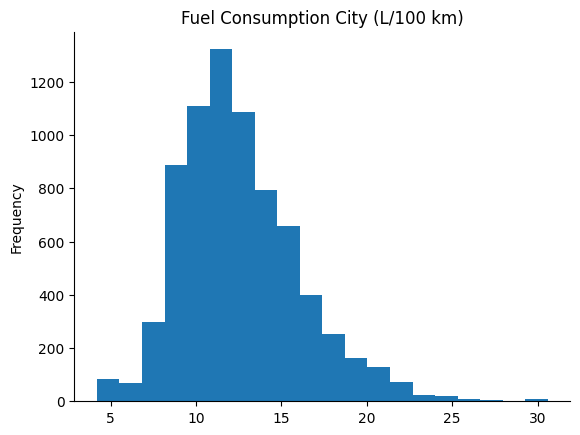

In [ ]:
# @title Fuel Consumption City (L/100 km)

from matplotlib import pyplot as plt
data['Fuel Consumption City (L/100 km)'].plot(kind='hist', bins=20, title='Fuel Consumption City (L/100 km)')
plt.gca().spines[['top', 'right',]].set_visible(False)

Distribution of CO2 Emissions: The histogram of CO2 emissions shows a somewhat normal distribution with a slight right skew, indicating that most vehicles emit a certain range of CO2, with fewer vehicles emitting very high or very low amounts.

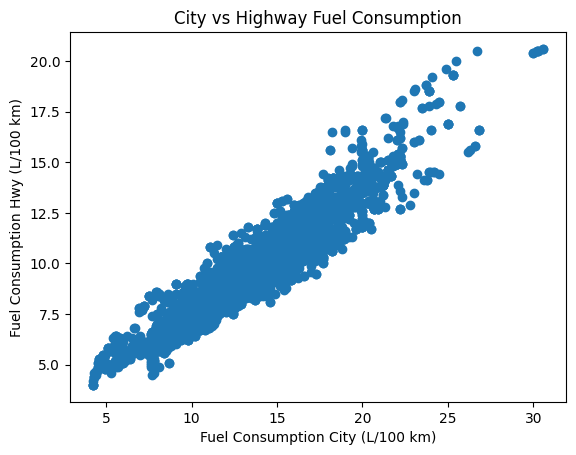

In [ ]:
# @title City vs Highway Fuel Consumption

import matplotlib.pyplot as plt
plt.scatter(data['Fuel Consumption City (L/100 km)'], data['Fuel Consumption Hwy (L/100 km)'])
plt.xlabel('Fuel Consumption City (L/100 km)')
plt.ylabel('Fuel Consumption Hwy (L/100 km)')
_ = plt.title('City vs Highway Fuel Consumption')

Positive Correlation: There is a clear positive linear relationship between city and highway fuel consumption. Vehicles that consume more fuel in the city also tend to consume more fuel on the highway.

Greater Variation in Highway Consumption: As city fuel consumption increases, the spread or variation in highway fuel consumption also increases. This suggests that the efficiency of vehicles can vary more significantly at highway speeds.

Higher Efficiency at Highway Speeds: For many vehicles, highway fuel consumption is lower than city fuel consumption. This is typical since vehicles are generally more fuel-efficient at constant high speeds, like those on highways, compared to the stop-and-go nature of city driving.

Densest Concentration: The densest cluster of points appears to be between approximately 7.5 and 15 L/100 km for city consumption and between 5 and 10 L/100 km for highway consumption, indicating that the majority of vehicles in this dataset have fuel consumptions within these ranges.

This kind of analysis is useful when assessing the overall fuel efficiency of a range of vehicles and can also be indicative of how different driving conditions affect fuel consumption. It can inform strategies for reducing fuel consumption and CO2 emissions by highlighting the importance of improving city driving efficiency.

<Axes: xlabel='Vehicle Class'>

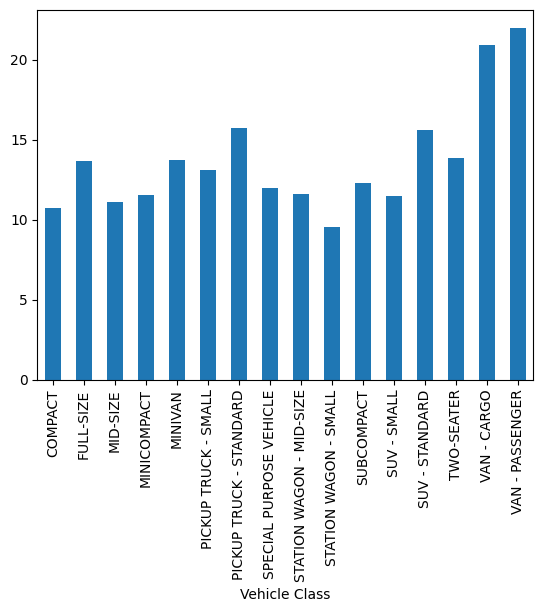

In [ ]:
# @title Fuel Consumption City by Vehicle Class

data.groupby('Vehicle Class')['Fuel Consumption City (L/100 km)'].mean().plot(kind='bar')

<ipython-input-10-28bf530e0947>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='Engine Size(L)', y='Fuel Type', inner='box', palette='Dark2')


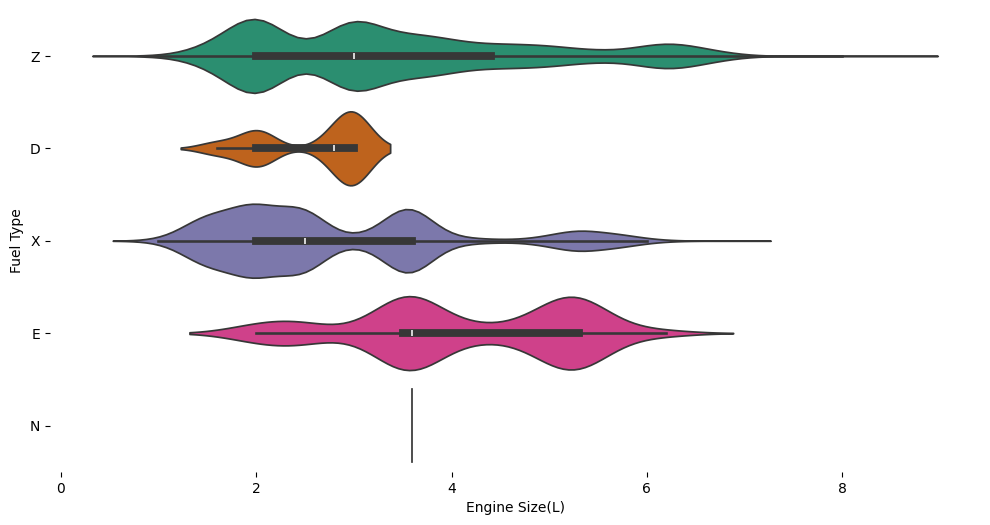

In [ ]:
# @title Fuel Type vs Engine Size(L)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Fuel Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Engine Size(L)', y='Fuel Type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

The fuel types are denoted by letters (Z, D, X, E, N), and the engine size is in liters (L). Here's a breakdown of what the plot is showing:

Z (Premium Gasoline): Vehicles using premium gasoline tend to have a wide range of engine sizes, with a substantial number of vehicles having larger engines, as indicated by the thicker portion of the violin plot for higher engine sizes.

D (Diesel): Diesel vehicles show a narrower distribution, with a peak around the 2-3 L engine size range. There's a smaller representation of diesel vehicles with very small or very large engines.

X (Regular Gasoline): This category has a broad distribution, similar to premium gasoline, but with a slightly more pronounced concentration around the mid-range engine sizes.

E (Ethanol E85): Ethanol-fueled vehicles show two peaks, suggesting that there are two common engine sizes for these vehicles. The distribution is not as wide as regular or premium gasoline vehicles.

N (Natural Gas): The natural gas category has very few data points, indicating fewer vehicles in the dataset that use this fuel type. The engine size for these vehicles varies but seems to concentrate around the smaller engine sizes.

Each 'violin' represents the kernel density estimation of the engine size for that particular fuel type. The thicker parts of each violin indicate where data points are more concentrated, meaning there are more vehicles with engine sizes in that range. The thin parts represent less common engine sizes for that fuel type.

The black bars in the center of each violin plot represent the interquartile range of the engine size, and the white dot represents the median engine size for that fuel type. The lines extending from the bars indicate the rest of the distribution, except for points that are determined to be "outliers" using a method that is a function of the interquartile range.

Overall, this plot is useful for understanding the distribution of engine sizes for vehicles using different types of fuel and can highlight which fuel types are associated with larger or smaller engines.

# Feature Understanding

Text(0.5, 0, 'CO2 Emissions(g/km)')

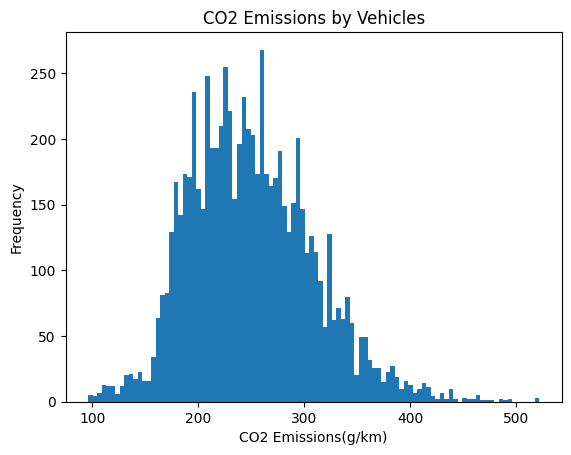

In [ ]:
# Create a histogram of CO2 emissions
plt1 = data["CO2 Emissions(g/km)"].plot(kind = "hist",bins = 100,title = "CO2 Emissions by Vehicles")

# Set the x-axis label
plt1.set_xlabel("CO2 Emissions(g/km)")


In [ ]:
#Feature Relationship

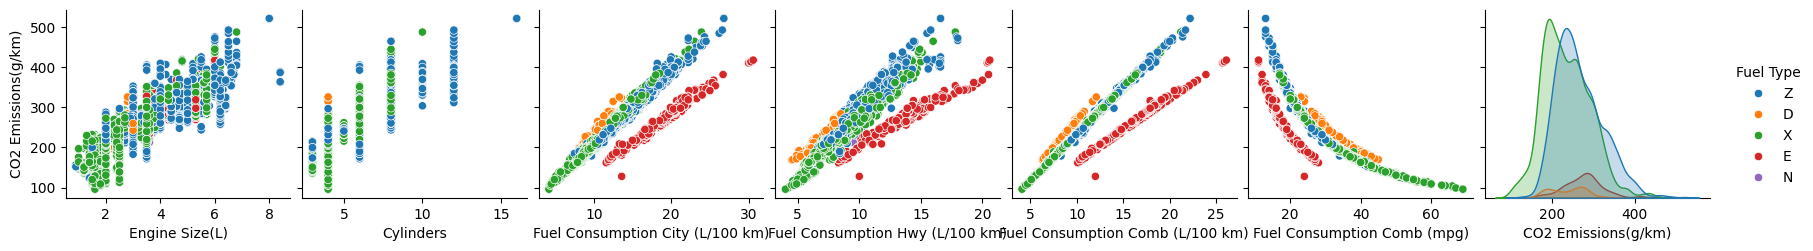

In [ ]:
# Create a pairplot with CO2 Emissions as the y-variable and Fuel Type as the hue
sns.pairplot(data,y_vars="CO2 Emissions(g/km)",hue = "Fuel Type")

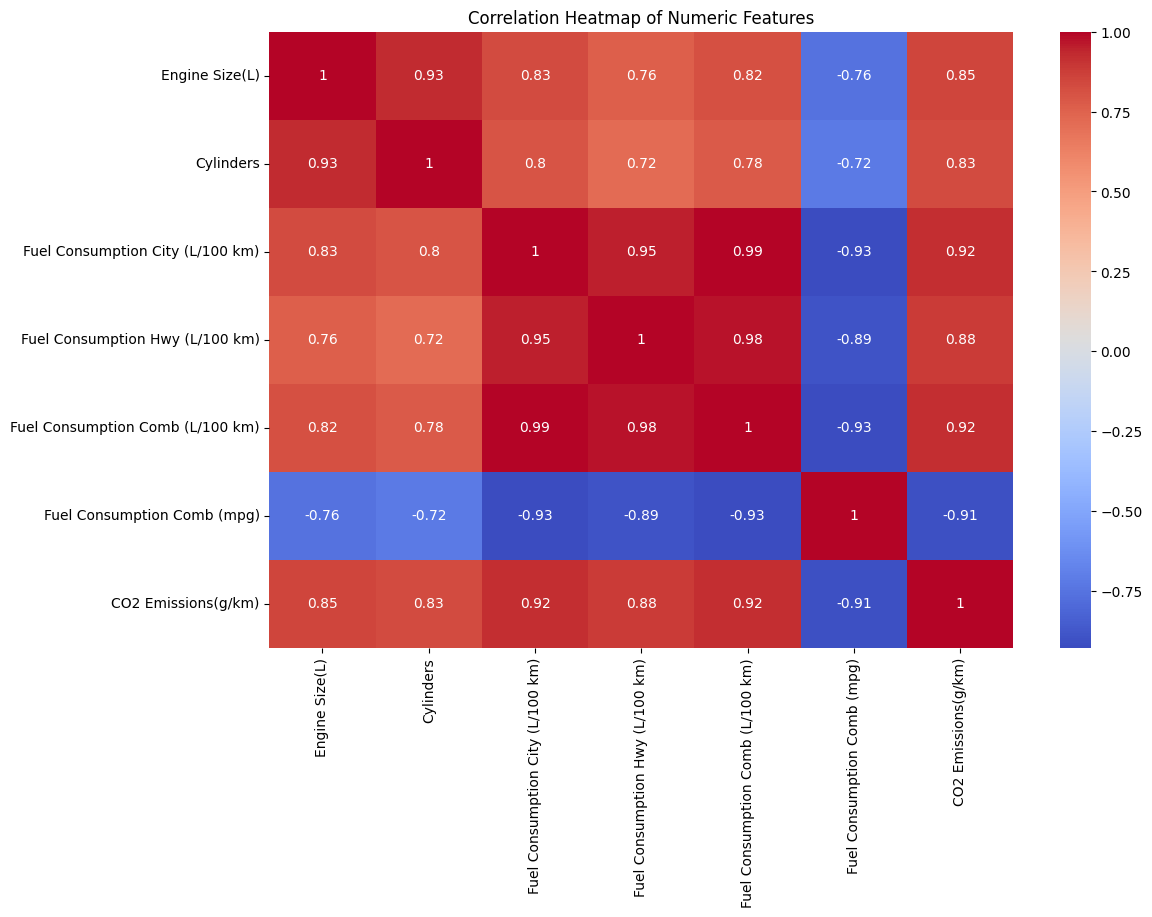

In [ ]:
# Create a figure with a specified size
plt.figure(figsize=(12, 8))

# Select only numeric columns from the dataset
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title of the plot
plt.title('Correlation Heatmap of Numeric Features')

# Display the plot
plt.show()

Correlation Heatmap of Numeric Features: The heatmap of correlations among numerical features shows strong correlations between CO2 emissions and fuel consumption metrics (city, highway, combined). There's also a notable correlation between engine size and CO2 emissions, as observed in the scatter plot.

In [ ]:
data.head()


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## **Feature Engineering**







Make: The brand of the vehicle.
Model: The model of the vehicle.
Vehicle Class: The class of the vehicle (e.g., compact, SUV).
Engine Size(L): The engine size in liters.
Cylinders: The number of cylinders in the engine.
Transmission: The type of transmission and the number of gears (e.g., AS5 indicates automatic with 5 speeds).
Fuel Type: The type of fuel the vehicle uses (e.g., Z for premium gasoline).
Fuel Consumption City (L/100 km): Fuel consumption in the city.
Fuel Consumption Hwy (L/100 km): Fuel consumption on the highway.
Fuel Consumption Comb (L/100 km): Combined fuel consumption (a weighted average of city and highway consumption).
Fuel Consumption Comb (mpg): Combined fuel consumption in miles per gallon.
CO2 Emissions(g/km): The target variable, indicating the amount of CO2 emissions in grams per kilometer.
Based on this information, we can proceed with feature engineering, model building, and evaluation. Here are some potential feature engineering steps we could take:

Creating New Features:

Engine Size to Cylinders Ratio: This might capture the efficiency or performance characteristic of the engine.
Fuel Efficiency Difference: The difference between highway and city fuel consumption to capture efficiency variance under different conditions.
Encoding Categorical Variables:

One-hot encode categorical variables like Make, Vehicle Class, Transmission, and Fuel Type to make them usable for machine learning models.
Normalizing/Scaling Features:

Scale the numerical features to ensure they're on the same scale, improving model performance and convergence speed.
After engineering features, we can split the dataset into training and testing sets, select several regression models to predict CO2 emissions, train these models on the training set, and evaluate their performance on the testing set using metrics like R-squared, RMSE, and MAE.

Let's start with feature engineering. We'll create the new features, encode the categorical variables, and normalize the dataset. Then, we'll proceed to model building and evaluation. ​​

Finished analyzing
Always expand output?
python
Copy code
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Create new features
data['Engine Size to Cylinders Ratio'] = data['Engine Size(L)'] / data['Cylinders']
data['Fuel Efficiency Difference'] = data['Fuel Consumption Hwy (L/100 km)'] - data['Fuel Consumption City (L/100 km)']

# Define categorical and numerical features
categorical_features = ['Make', 'Vehicle Class', 'Transmission', 'Fuel Type']
numerical_features = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)',
                      'Fuel Consumption Comb (L/100 km)', 'Fuel Efficiency Difference', 'Engine Size to Cylinders Ratio']

# One-hot encoding for categorical features and scaling for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split the dataset into training and testing sets
X = data.drop('CO2 Emissions(g/km)', axis=1)
y = data['CO2 Emissions(g/km)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply transformations
preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

X_train_transformed.shape, X_test_transformed.shape
Result
((5908, 96), (1477, 96))
The feature engineering step has been completed, resulting in a transformed dataset ready for model building. Here's what was done:

New Features Created:

Engine Size to Cylinders Ratio: To potentially capture the engine's efficiency or performance characteristic.
Fuel Efficiency Difference: The difference between highway and city fuel consumption to capture efficiency variance under different conditions.
Encoding and Scaling:

Categorical variables (Make, Vehicle Class, Transmission, Fuel Type) were one-hot encoded.
Numerical features were scaled to ensure they're on the same scale.
The dataset was split into training and testing sets, with 80% of the data used for training and the remaining 20% for testing. After preprocessing, the training set consists of 5908 samples, and the testing set consists of 1477 samples, each with 96 features after encoding and scaling.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Create new features
data['Engine Size to Cylinders Ratio'] = data['Engine Size(L)'] / data['Cylinders']
data['Fuel Efficiency Difference'] = data['Fuel Consumption Hwy (L/100 km)'] - data['Fuel Consumption City (L/100 km)']
data['Avg_Fuel_Consumption'] = (data['Fuel Consumption City (L/100 km)'] + data['Fuel Consumption Hwy (L/100 km)']) / 2
# Define categorical and numerical features
categorical_features = ['Make', 'Vehicle Class', 'Transmission', 'Fuel Type']
numerical_features = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)',
                      'Fuel Consumption Comb (L/100 km)', 'Fuel Efficiency Difference', 'Engine Size to Cylinders Ratio']

# One-hot encoding for categorical features and scaling for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split the dataset into training and testing sets
X = data.drop('CO2 Emissions(g/km)', axis=1)
y = data['CO2 Emissions(g/km)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply transformations
preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

X_train_transformed.shape, X_test_transformed.shape

((5908, 96), (1477, 96))

In [ ]:
# Dumping the preprocessor pickle file for

import pickle

with open('preprocessor.pkl', 'wb') as file:
    pickle.dump(preprocessor, file)


In [ ]:
X_train.keys()

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'Engine Size to Cylinders Ratio',
       'Fuel Efficiency Difference', 'Avg_Fuel_Consumption'],
      dtype='object')

In [ ]:
# Get the column names of the training data
X_train.keys()

In [ ]:
# Fit the preprocessor to the training data and print the fitted object
print(preprocessor.fit(X_train))

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Engine Size(L)', 'Cylinders',
                                  'Fuel Consumption City (L/100 km)',
                                  'Fuel Consumption Hwy (L/100 km)',
                                  'Fuel Consumption Comb (L/100 km)',
                                  'Fuel Efficiency Difference',
                                  'Engine Size to Cylinders Ratio']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Make', 'Vehicle Class', 'Transmission',
                                  'Fuel Type'])])


In [ ]:
# Get the shape (number of rows and columns) of the training data
X_train.shape

(5908, 14)

In [ ]:
import pandas as pd

# Convert X_train_transformed to a Pandas DataFrame for visualization
df = pd.DataFrame(X_train_transformed)

# Print the first few rows of the DataFrame
print(df.head())


                                                   0
0    (0, 0)\t-0.12149345337340561\n  (0, 1)\t0.20...
1    (0, 0)\t0.6141664036831481\n  (0, 1)\t0.2053...
2    (0, 0)\t-0.12149345337340561\n  (0, 1)\t0.20...
3    (0, 0)\t0.17277048944921583\n  (0, 1)\t0.205...
4    (0, 0)\t-0.8571533104299593\n  (0, 1)\t-0.88...


In [ ]:
X_train.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Engine Size to Cylinders Ratio,Fuel Efficiency Difference,Avg_Fuel_Consumption
6590,BMW,M240i Coupe,SUBCOMPACT,3.0,6,AS8,Z,11.4,8.1,9.9,29,0.500000,-3.3,9.75
6274,NISSAN,Frontier,PICKUP TRUCK - SMALL,4.0,6,A5,X,14.7,10.3,12.7,22,0.666667,-4.4,12.50
2251,AUDI,S4 QUATTRO,COMPACT,3.0,6,M6,Z,13.8,9.0,11.7,24,0.500000,-4.8,11.40
3149,PORSCHE,CAYMAN S,TWO-SEATER,3.4,6,AM7,Z,11.3,7.9,9.8,29,0.566667,-3.4,9.60
4362,VOLVO,V90 T5,STATION WAGON - MID-SIZE,2.0,4,AS8,Z,10.1,7.0,8.7,32,0.500000,-3.1,8.55


In [ ]:
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Engine Size to Cylinders Ratio,Fuel Efficiency Difference,Avg_Fuel_Consumption
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,0.500000,-3.2,8.30
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,0.600000,-3.5,9.45
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,0.375000,-0.2,5.90
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,0.583333,-3.6,10.90
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,0.583333,-3.4,10.40


Feature for the average fuel consumption.

In [ ]:
display(data['Avg_Fuel_Consumption'])

0        8.30
1        9.45
2        5.90
3       10.90
4       10.40
        ...  
7380     9.20
7381     9.75
7382    10.15
7383     9.75
7384    10.45
Name: Avg_Fuel_Consumption, Length: 7385, dtype: float64

In [ ]:
# Get the number of rows and columns in the data
data.shape


(7385, 15)

Preliminary Evaluation of machine learning
models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize a dictionary of regression models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}
# Function to train and evaluate a model
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return rmse, mae, r2

# Train and evaluate each model
results = {}
for name, model in models.items():
    rmse, mae, r2 = train_and_evaluate(model, X_train_transformed, y_train, X_test_transformed, y_test)
    results[name] = {"RMSE": rmse, "MAE": mae, "R^2": r2}

results


{'Linear Regression': {'RMSE': 5.3534330508582,
  'MAE': 3.0297117597224195,
  'R^2': 0.991667921557746},
 'Random Forest': {'RMSE': 3.3388956290788405,
  'MAE': 1.7489891574387797,
  'R^2': 0.9967588861587808},
 'Gradient Boosting': {'RMSE': 3.9103274288073835,
  'MAE': 2.543550470108296,
  'R^2': 0.9955545590386112}}

The Random Forest model shows the best performance among the three, with the lowest RMSE and MAE, and the highest R^2 score, indicating a very high level of accuracy in predicting CO2 emissions from the given features. The Gradient Boosting model also performs well, with slightly higher errors than Random Forest but still with a high R^2 score. The Linear Regression model, while still highly accurate, has higher RMSE and MAE values compared to the other models

Testing other regression models

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 18.1 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor



In [ ]:
# Redefining models without CatBoost and LightGBM, correcting the oversight
models_add = {
    "Ridge Regression": Ridge(random_state=42),
    "Lasso Regression": Lasso(random_state=42),
    "Elastic Net": ElasticNet(random_state=42),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Support Vector Regression": SVR(),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor(),
    "XGBoost Regressor": XGBRegressor(random_state=42, verbosity=0)  # Adjusted for verbosity
}

# Re-evaluate the corrected list of models
additional_results= {}
for name, model in models_add.items():
    rmse, mae, r2 = train_and_evaluate(model, X_train_transformed, y_train, X_test_transformed, y_test)
    additional_results[name] = {"RMSE": rmse, "MAE": mae, "R^2": r2}

additional_results


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2962.7248608829686, tolerance: 2019.6799427725111
  model = cd_fast.sparse_enet_coordinate_descent(


{'Ridge Regression': {'RMSE': 5.336203335744412,
  'MAE': 3.042388190130787,
  'R^2': 0.9917214678775692},
 'Lasso Regression': {'RMSE': 9.712737442302698,
  'MAE': 6.499953858967325,
  'R^2': 0.9725734048331798},
 'Elastic Net': {'RMSE': 20.590078087827052,
  'MAE': 14.768577849943126,
  'R^2': 0.8767449887532933},
 'Decision Tree Regressor': {'RMSE': 3.710007550773831,
  'MAE': 1.75866240507405,
  'R^2': 0.995998358435963},
 'Support Vector Regression': {'RMSE': 17.406586451129535,
  'MAE': 7.630343507433195,
  'R^2': 0.9119121883374879},
 'K-Nearest Neighbors Regressor': {'RMSE': 8.540521120843394,
  'MAE': 5.814759647935002,
  'R^2': 0.9787940691752327},
 'XGBoost Regressor': {'RMSE': 3.3465267569713335,
  'MAE': 1.8438031371574428,
  'R^2': 0.996744053937992}}

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Create a DataFrame with your model performance data
data = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Ridge Regression',
              'Lasso Regression', 'Elastic Net', 'Decision Tree Regressor',
              'Support Vector Regression', 'K-Nearest Neighbors Regressor', 'XGBoost Regressor','ANN regressor'],
    'RMSE': [5.35, 3.34, 3.91, 5.34, 9.71, 20.59, 3.71, 17.41, 8.54, 3.35,4.31],
    'MAE': [3.03, 1.75, 2.54, 3.04, 6.50, 14.77, 1.76, 7.63, 5.82, 1.84,3.449],
    'R2': [0.992, 0.997, 0.996, 0.992, 0.973, 0.877, 0.996, 0.912, 0.979, 0.997,0.994]

}
df = pd.DataFrame(data)


<ipython-input-6-3f6c95b422b6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RMSE', y='Model', data=df, palette='viridis')
<ipython-input-6-3f6c95b422b6>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MAE', y='Model', data=df, palette='viridis')
<ipython-input-6-3f6c95b422b6>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2', y='Model', data=df, palette='viridis')


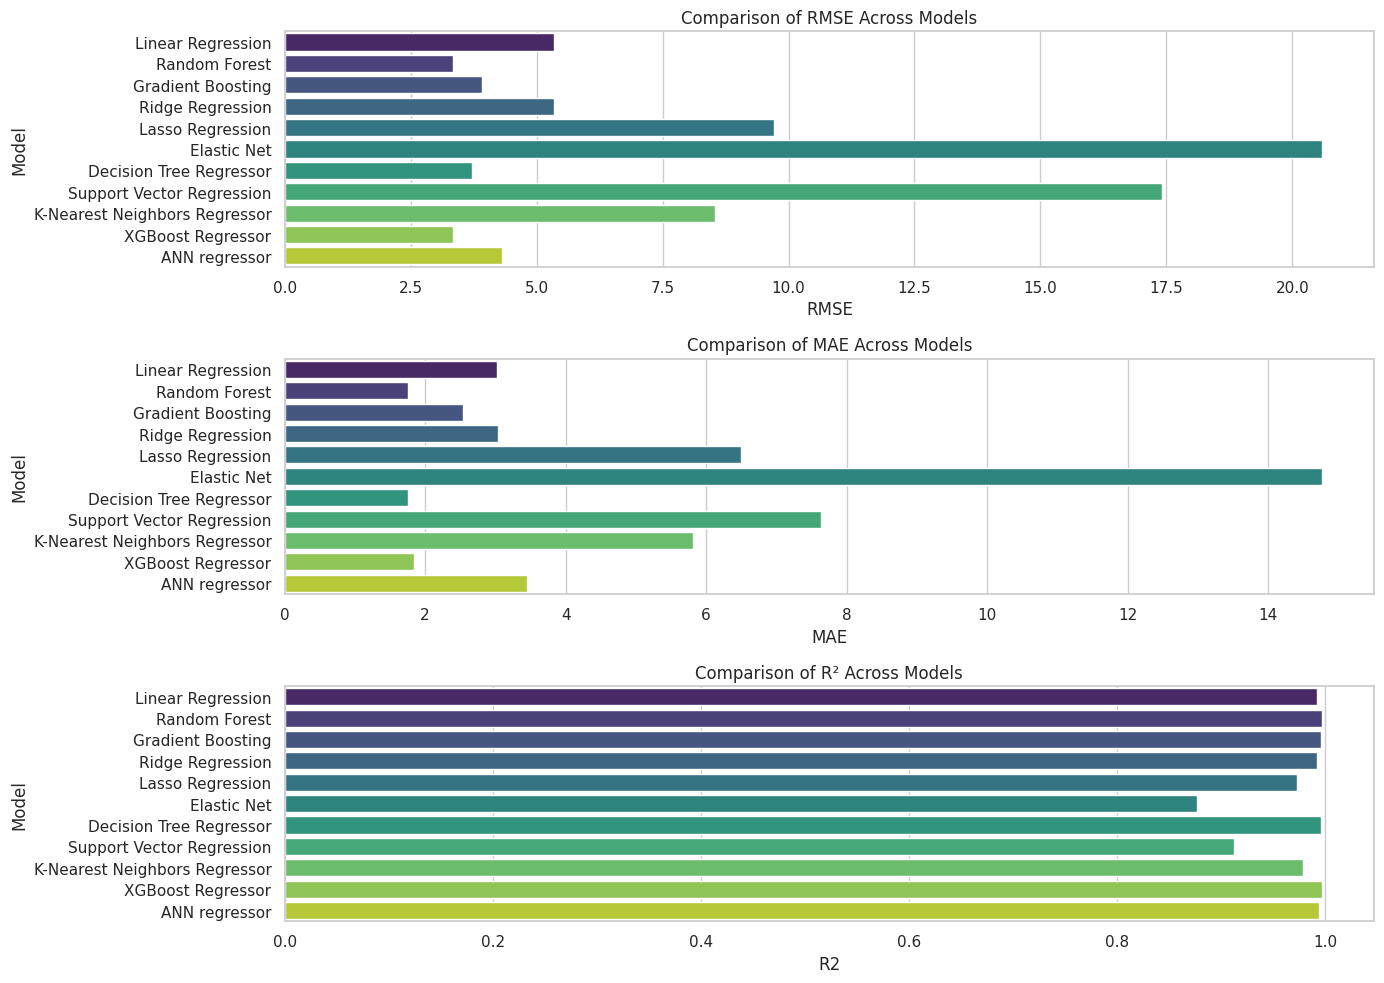

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure to host the plots
plt.figure(figsize=(14, 10))

# Plot RMSE
plt.subplot(3, 1, 1)
sns.barplot(x='RMSE', y='Model', data=df, palette='viridis')
plt.title('Comparison of RMSE Across Models')

# Plot MAE
plt.subplot(3, 1, 2)
sns.barplot(x='MAE', y='Model', data=df, palette='viridis')
plt.title('Comparison of MAE Across Models')

# Plot R²
plt.subplot(3, 1, 3)
sns.barplot(x='R2', y='Model', data=df, palette='viridis')
plt.title('Comparison of R² Across Models')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [ ]:

import pickle

# Save the Random Forest model
with open('random_forest_model.pkl', 'wb') as f:
  pickle.dump(models["Random Forest"], f)


In [ ]:
#Download and store the above model in my local system

from google.colab import files
files.download('random_forest_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Preliminary Evaluation Insights**


Linear Regression:

RMSE: 5.35
MAE: 3.03
R²: 0.992

Random Forest:

RMSE: 3.34
MAE: 1.75
R²: 0.997

Gradient Boosting:

RMSE: 3.91
MAE: 2.54
R²: 0.996

Ridge Regression:

RMSE: 5.34
MAE: 3.04
R²: 0.992

Lasso Regression:

RMSE: 9.71
MAE: 6.50
R²: 0.973

Elastic Net:

RMSE: 20.59
MAE: 14.77
R²: 0.877

Decision Tree Regressor:

RMSE: 3.71
MAE: 1.76
R²: 0.996

Support Vector Regression:

RMSE: 17.41
MAE: 7.63
R²: 0.912

K-Nearest Neighbors Regressor:

RMSE: 8.54
MAE: 5.82
R²: 0.979

XGBoost Regressor:

RMSE: 3.35
MAE: 1.84
R²: 0.997
Given the above results, the Random Forest and XGBoost Regressor models emerge as the top performers, closely followed by the Decision Tree Regressor. These models not only provided the lowest RMSE and MAE scores but also achieved the highest R² values, indicating they are highly effective at predicting CO2 emissions from the dataset.

The Linear Regression and Ridge Regression models also showed strong performance, offering simpler, more interpretable alternatives with relatively high R² values and reasonable error metrics.

On the other end, the Elastic Net and Support Vector Regression models underperformed compared to the others, indicating they may not be as suitable for this particular prediction task given the dataset.

Hyperparameter Tuning with Grid Search and Randomized Search

---



In [ ]:
#write me code to do grid search CV

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
# Define the parameter grid for the Random Forest model
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [ 5,8,10],
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2']
    }

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train_transformed, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters
print("Best parameters:", best_params)





Best parameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid for the Random Forest model
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 8, 10],

}

# Perform Randomized Search Cross-Validation
random_search = RandomizedSearchCV(rf, param_grid, cv=5, random_state=42, n_iter=10)
random_search.fit(X_train_transformed, y_train)

# Get the best model and its parameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Print the best parameters
print("Best parameters:", best_params)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'n_estimators': 300, 'max_depth': 10}


In [ ]:
# Evaluate the best model on the test set
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
best_model.fit(X_train_transformed, y_train)
predictions = best_model.predict(X_test_transformed)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Test RMSE:", rmse)
print("Test MAE:", mae)
print("Test R^2:", r2)


Test RMSE: 3.388944100170384
Test MAE: 2.015861807051613
Test R^2: 0.9966609923895966


In [ ]:
# Save the best model
with open('best_random_forest_model.pkl', 'wb') as f:
  pickle.dump(best_model, f)

files.download('best_random_forest_model.pkl')

**DeepLearning Modeling**

In [ ]:
pip install tensorflow


In [ ]:
# Print the data type of X_train_transformed
print(type(X_train_transformed))

# Print the data type of y_train
print(type(y_train))

<class 'scipy.sparse._csr.csr_matrix'>
<class 'pandas.core.series.Series'>


In [ ]:
# Check if X_train_transformed and X_test_transformed are not NumPy arrays
if not isinstance(X_train_transformed, np.ndarray) or not isinstance(X_test_transformed,np.ndarray):
    # Convert them to NumPy arrays using toarray()
    X_train_transformed = X_train_transformed.toarray()
    X_test_transformed = X_test_transformed.toarray()

# Check if y_train and y_test are not NumPy arrays
if not isinstance(y_train, np.ndarray) or not isinstance(y_test, np.ndarray):
    # Convert them to NumPy arrays
    y_train = np.array(y_train)
    y_test = np.array(y_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler

# Model configuration
model_DL = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_transformed.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer with one neuron since it's regression
])

# Compile the model
model_DL.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model_DL.fit(X_train_transformed, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
148/148 [==============================] - 2s 4ms/step - loss: 28919.5488 - mae: 135.3773 - val_loss: 1001.0999 - val_mae: 22.2141
Epoch 2/50
148/148 [==============================] - 1s 3ms/step - loss: 626.1713 - mae: 18.7226 - val_loss: 197.1545 - val_mae: 9.8449
Epoch 3/50
148/148 [==============================] - 1s 4ms/step - loss: 305.3459 - mae: 13.3720 - val_loss: 77.3424 - val_mae: 5.9884
Epoch 4/50
148/148 [==============================] - 1s 4ms/step - loss: 230.8824 - mae: 11.7737 - val_loss: 44.3539 - val_mae: 4.5734
Epoch 5/50
148/148 [==============================] - 1s 4ms/step - loss: 211.1811 - mae: 11.2654 - val_loss: 32.8947 - val_mae: 3.8911
Epoch 6/50
148/148 [==============================] - 1s 4ms/step - loss: 199.4479 - mae: 10.9580 - val_loss: 33.8316 - val_mae: 4.1291
Epoch 7/50
148/148 [==============================] - 1s 3ms/step - loss: 194.0070 - mae: 10.7502 - val_loss: 25.9894 - val_mae: 3.4083
Epoch 8/50
148/148 [=====================

In [ ]:
# Evaluate the model on test data
test_loss, test_mae = model_DL.evaluate(X_test_transformed, y_test, verbose=0)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

# To make predictions
# predictions = model.predict(X_test_scaled)

Test Loss: 13.270919799804688, Test MAE: 2.688253402709961


In [ ]:
# Train and evaluate the model
rmse, mae, r2 = train_and_evaluate(model_DL, X_train_transformed, y_train, X_test_transformed, y_test)

# Print the evaluation metrics
print("RMSE:", rmse, "MAE:", mae, "R^2:", r2)

47/47 [==============================] - 0s 2ms/step
RMSE: 4.318602767461553 MAE: 3.4491637636054264 R^2: 0.9945778052052026


## Hyperparameter Tuning

In [ ]:
pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.7 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=(X_train_transformed.shape[1],)))

    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    model.add(keras.layers.Dropout(0.2))

    # Add one more hidden layer
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))

    # Output layer
    model.add(keras.layers.Dense(1))

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='mse',
                  metrics=['mae'])

    return model

# Initialize the tuner
tuner = RandomSearch(
    build_model,
    objective='val_mae',  # Minimize MAE; you can also use 'val_loss' to minimize MSE
    max_trials=10,        # Total number of trials to run
    executions_per_trial=1,  # Number of models to train for one trial
    directory='my_dir',   # Directory to save logs and models
    project_name='keras_tune'
)

# Summary of the hyperparameter search space
tuner.search_space_summary()


Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
tuner.search(X_train_transformed, y_train, epochs=50, validation_split=0.2, verbose=1)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best number of units in the first densely-connected layer: {best_hps.get('units')}")
print(f"Best learning rate for the optimizer: {best_hps.get('learning_rate')}")


Trial 10 Complete [00h 00m 27s]
val_mae: 2.572327136993408

Best val_mae So Far: 2.43855357170105
Total elapsed time: 00h 04m 28s
Best number of units in the first densely-connected layer: 512
Best learning rate for the optimizer: 0.0001


In [ ]:
# Build the model with the optimal hyperparameters and train it on the data
model_DL1 = tuner.hypermodel.build(best_hps)
history = model_DL1.fit(X_train_transformed, y_train, epochs=50, validation_split=0.2)


Epoch 1/50
148/148 [==============================] - 2s 4ms/step - loss: 61897.7578 - mae: 242.0971 - val_loss: 54095.0742 - val_mae: 225.7919
Epoch 2/50
148/148 [==============================] - 0s 3ms/step - loss: 35395.1367 - mae: 178.2446 - val_loss: 16209.5381 - val_mae: 118.6598
Epoch 3/50
148/148 [==============================] - 0s 3ms/step - loss: 7417.4429 - mae: 74.2056 - val_loss: 3570.9221 - val_mae: 49.1267
Epoch 4/50
148/148 [==============================] - 0s 3ms/step - loss: 2648.4421 - mae: 41.3567 - val_loss: 1800.3029 - val_mae: 32.9035
Epoch 5/50
148/148 [==============================] - 0s 3ms/step - loss: 1399.0619 - mae: 28.6938 - val_loss: 990.2745 - val_mae: 23.1902
Epoch 6/50
148/148 [==============================] - 0s 3ms/step - loss: 843.5752 - mae: 21.6254 - val_loss: 610.5269 - val_mae: 17.6421
Epoch 7/50
148/148 [==============================] - 0s 3ms/step - loss: 573.1070 - mae: 17.8330 - val_loss: 417.1290 - val_mae: 14.4048
Epoch 8/50
148/14

In [ ]:
rmse, mae, r2 = train_and_evaluate(model_DL1, X_train_transformed, y_train, X_test_transformed, y_test)
print("RMSE:", rmse, "MAE:", mae, "R^2:", r2)

47/47 [==============================] - 0s 1ms/step
RMSE: 4.070471294555347 MAE: 2.72642524838044 R^2: 0.9951829850844337
